In [1]:
import pickle
import spacy 
import string
import pandas as pd
from scipy.sparse import save_npz, load_npz

In [2]:
X_train = load_npz('X_train.npz')
X_test = load_npz('X_test.npz')

In [3]:
y_train = pd.read_csv('y_train.csv')['sentiment']
y_test = pd.read_csv('y_test.csv')['sentiment']

In [4]:
# label2index = dict()
# index2label = dict()
# for i,unq_label in enumerate(df.label.unique()):
#     label2index[unq_label] = i
#     index2label[i] = unq_label
# df.label = [label2index[l] for l in df.label]

In [5]:
with open('model.pkl', 'rb') as file:
        my_rf = pickle.load(file)

In [6]:
y_pred_rf_new = my_rf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
accuracy_score(y_test,y_pred_rf_new)

0.859375

In [9]:
cm = confusion_matrix(y_test,y_pred_rf_new)
cm

array([[201,   2,   8,   1,  19,   0],
       [  8, 164,   8,   0,   6,   8],
       [ 10,   6, 470,  33,  22,   2],
       [  1,   0,  25, 106,   3,   0],
       [  6,  10,  20,   8, 378,   2],
       [  0,  10,   5,   0,   2,  56]])

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
my_classes = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

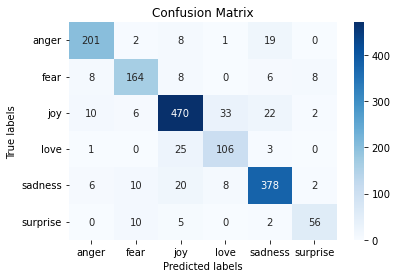

In [12]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=my_classes, yticklabels=my_classes, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [13]:
cr = classification_report(y_test,y_pred_rf_new,output_dict=True)
cr

{'0': {'precision': 0.8893805309734514,
  'recall': 0.8701298701298701,
  'f1-score': 0.8796498905908098,
  'support': 231},
 '1': {'precision': 0.8541666666666666,
  'recall': 0.845360824742268,
  'f1-score': 0.8497409326424871,
  'support': 194},
 '2': {'precision': 0.8768656716417911,
  'recall': 0.8655616942909761,
  'f1-score': 0.871177015755329,
  'support': 543},
 '3': {'precision': 0.7162162162162162,
  'recall': 0.7851851851851852,
  'f1-score': 0.7491166077738516,
  'support': 135},
 '4': {'precision': 0.8790697674418605,
  'recall': 0.8915094339622641,
  'f1-score': 0.8852459016393444,
  'support': 424},
 '5': {'precision': 0.8235294117647058,
  'recall': 0.7671232876712328,
  'f1-score': 0.7943262411347518,
  'support': 73},
 'accuracy': 0.859375,
 'macro avg': {'precision': 0.8398713774507819,
  'recall': 0.8374783826636326,
  'f1-score': 0.838209431589429,
  'support': 1600},
 'weighted avg': {'precision': 0.8605160708331592,
  'recall': 0.859375,
  'f1-score': 0.85972425

In [14]:
cr.get('0')

{'precision': 0.8893805309734514,
 'recall': 0.8701298701298701,
 'f1-score': 0.8796498905908098,
 'support': 231}

In [15]:
cr.get('macro avg')

{'precision': 0.8398713774507819,
 'recall': 0.8374783826636326,
 'f1-score': 0.838209431589429,
 'support': 1600}

In [16]:
cr.get('weighted avg')

{'precision': 0.8605160708331592,
 'recall': 0.859375,
 'f1-score': 0.8597242532260325,
 'support': 1600}

In [17]:
import spacy 
my_nlp = spacy.load("en_core_web_sm")
stopwords = my_nlp.Defaults.stop_words

In [18]:
def text_preprocessing(text):
    my_nlp = spacy.load("en_core_web_sm")
    my_tokens = no_stopword_tokens = final_tokens = []
    #removing punctuations
    my_text = "".join([i for i in text if i not in string.punctuation])
    # lowering text
    my_text = my_text.lower()
    # tokenization
    doc = my_nlp(my_text)
    my_tokens = [token.text for token in doc]
    #removing stopwords
    no_stopword_tokens = [i for i in my_tokens if i not in stopwords]
    
    # the lemmatizer expects doesnot accept string values 
    # hence we need to make it spacy sentence
    text = ' '.join(no_stopword_tokens)
    text = my_nlp(text)
    final_tokens = [i.lemma_ for i in text]
    return final_tokens

In [19]:
my_df = pd.read_csv('preprocessed_text.csv')

In [20]:
from sklearn import preprocessing 
my_label_encoder = preprocessing.LabelEncoder()
my_df['sentiment'] = my_label_encoder.fit_transform(my_df['sentiment'])

In [72]:
tokens = [[]]
our_text = ["Ram fell in love with sita. They are like love birds. ", "I am very unhappy. I am sad"]
our_label = ['love','sadness']
tokens = [text_preprocessing(text) for text in our_text]
our_label = my_label_encoder.transform(our_label)

In [73]:
tokens

[['ram', 'fall', 'love', 'sita', 'like', 'love', 'bird'], ['unhappy', 'sad']]

In [74]:
our_label

array([3, 4])

In [75]:
import ast   

In [76]:
def remove_short_text(text_list,min_length):
    #text_list = ast.literal_eval(text_list)
    return [text for text in text_list if len(text) >= min_length]

In [77]:
final_tokens = [remove_short_text(token,3) for token in tokens]

In [78]:
final_tokens

[['ram', 'fall', 'love', 'sita', 'like', 'love', 'bird'], ['unhappy', 'sad']]

In [79]:
import pickle 
with open('my_vocabulary.pkl', 'rb') as f:
    my_vocabulary = pickle.load(f)

In [80]:
my_vocabulary

{'feel': 3827,
 'hopeless': 4967,
 'damned': 2471,
 'hopeful': 4965,
 'care': 1492,
 'awake': 737,
 'grab': 4474,
 'minute': 6686,
 'post': 8027,
 'greedy': 4524,
 'wrong': 11763,
 'nostalgic': 7183,
 'fireplace': 3928,
 'know': 5852,
 'property': 8232,
 'grouchy': 4552,
 'little': 6147,
 'burden': 1362,
 'lately': 5936,
 'not': 7186,
 'sure': 10209,
 'take': 10331,
 'milligrams': 6653,
 'time': 10603,
 'recommend': 8523,
 'fall': 3741,
 'asleep': 613,
 'lot': 6229,
 'fast': 3779,
 'like': 6095,
 'funny': 4237,
 'confused': 2067,
 'life': 6078,
 'teenager': 10415,
 'jade': 5550,
 'year': 11801,
 'old': 7323,
 'man': 6371,
 'petrona': 7783,
 'petronas': 7784,
 'perform': 7723,
 'huge': 5016,
 'profit': 8201,
 'romantic': 8886,
 'suffer': 10138,
 'see': 9188,
 'mean': 6509,
 'run': 8951,
 'divine': 2987,
 'experience': 3659,
 'expect': 3652,
 'type': 10916,
 'spiritual': 9811,
 'encounter': 3391,
 'think': 10530,
 'easy': 3221,
 'dissatisfied': 2949,
 'low': 6253,
 'energy': 3415,
 'thir

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
vectorizer = CountVectorizer(vocabulary=my_vocabulary)

In [83]:
def join_words(text):
    return " ".join(text)
final_tokens = [join_words(x) for x in final_tokens]
final_tokens

['ram fall love sita like love bird', 'unhappy sad']

In [84]:
transformed_new_data = vectorizer.transform(final_tokens)

In [86]:
y_pred_rf_new = my_rf.predict(transformed_new_data)

In [87]:
accuracy_score(our_label,y_pred_rf_new)

1.0